In [64]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [65]:
df = pd.read_csv( 'insurance_data.csv')

In [66]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


([<matplotlib.patches.Wedge at 0x28b4cdac590>,
 [Text(0.06395927372182307, 1.0981389763162843, 'Did not buy'),
  Text(-0.06395927372182296, -1.0981389763162843, 'Bought')])

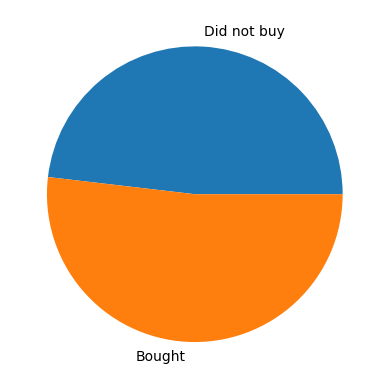

In [67]:
counts = df.bought_insurance.value_counts( ).sort_index()

plt.pie( counts  , labels = ['Did not buy', 'Bought']  )

In [68]:
counts 

bought_insurance
0    13
1    14
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x28b4ce1c7a0>,
 [Text(15, 0, '15'),
  Text(19, 0, '19'),
  Text(23, 0, '23'),
  Text(27, 0, '27'),
  Text(31, 0, '31'),
  Text(35, 0, '35'),
  Text(39, 0, '39'),
  Text(43, 0, '43'),
  Text(47, 0, '47'),
  Text(51, 0, '51'),
  Text(55, 0, '55'),
  Text(59, 0, '59'),
  Text(63, 0, '63')])

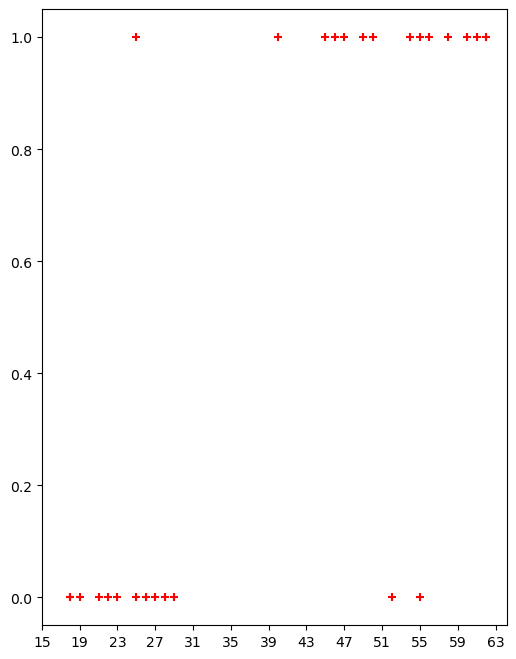

In [69]:
plt.figure( figsize =( 6 , 8 ))
plt.scatter(df.age , df.bought_insurance , marker= "+" , color ='red')
plt.xticks( range( 15 , 66 , 4))

In [70]:
from sklearn.model_selection  import train_test_split 

In [71]:
X_train,X_test , y_train , y_test = train_test_split( df[['age']]  , df.bought_insurance  , train_size = 0.5 )

In [72]:
from sklearn.linear_model import LogisticRegression 
lr  = LogisticRegression()

In [73]:
lr.fit( X_train , y_train )

LogisticRegression()

In [114]:
kaka = lr.predict_proba(X_test)
joe = kaka[: , 1 ]


In [75]:
y_predicted = lr.predict( X_test )

In [115]:
y_predicted

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [77]:
lr.coef_

array([[0.17014882]])

In [78]:
lr.intercept_

array([-6.79791368])

In [79]:
import math 
def sigmoid ( x ):
    return 1 / ( 1 + math.exp(-x))

In [80]:
def pre_function( age ):
    z = 0.16342748*age + -6.33359087 
    return sigmoid( z )


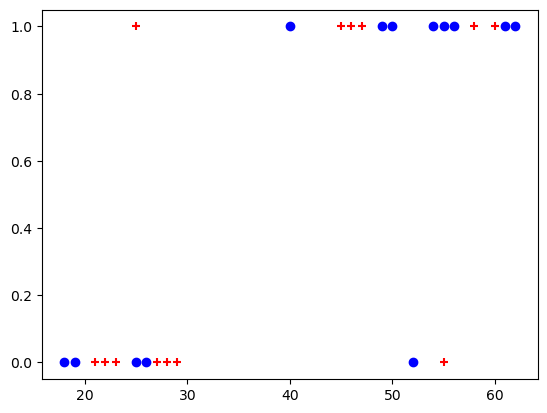

In [81]:
plt.scatter(df.age , df.bought_insurance , marker= "+" , color ='red')
plt.scatter( X_train , y_train, color='blue', label="Logistic Regression Curve")  # Sigmoid curve



In [83]:
hr = pd.read_csv( "HR_comma_sep.csv")

In [96]:
hr['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [163]:
hr.shape

(14999, 10)

<Axes: xlabel='last_evaluation', ylabel='left'>

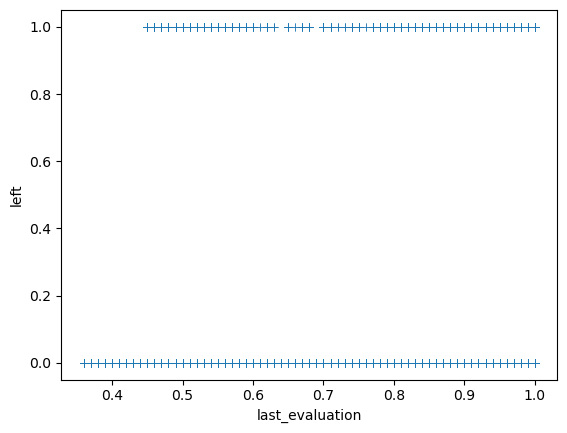

In [102]:
kk = LogisticRegression 
sns.scatterplot( x =  hr['satisfaction_level']  , y =  hr['left']  , marker = '+'   )

<Axes: xlabel='number_project', ylabel='left'>

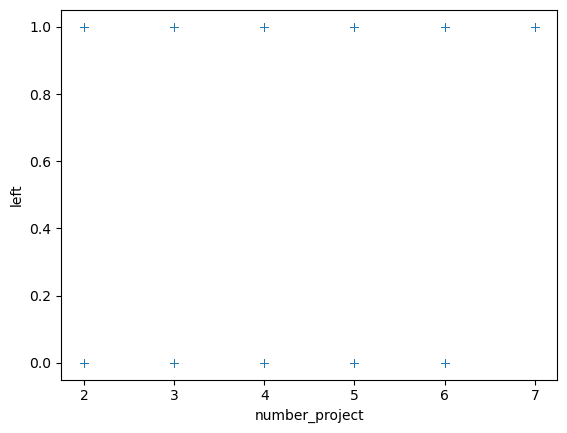

In [103]:
sns.scatterplot( x =  hr['number_project']  , y =  hr['left']  , marker = '+' ,  )

<Axes: xlabel='average_montly_hours', ylabel='left'>

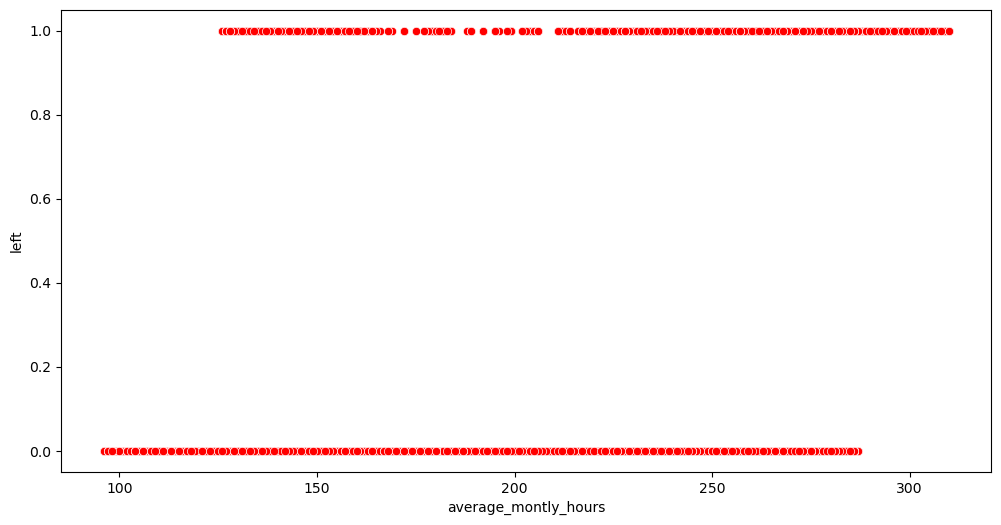

In [112]:
plt.figure( figsize=( 12 , 6 ))
sns.scatterplot( x =  hr['average_montly_hours']  , y =  hr['left']  , marker = 'o' , color = 'red' )

In [118]:
hr.groupby('left').mean(numeric_only=True)
# we can conclude that people withless sattisfaction , lesss proomtion rates , and more working hours ( monthy)  are more likely to leave the 
# company 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [121]:
 cliff = pd.crosstab( hr.salary , hr.left )


<Axes: xlabel='salary'>

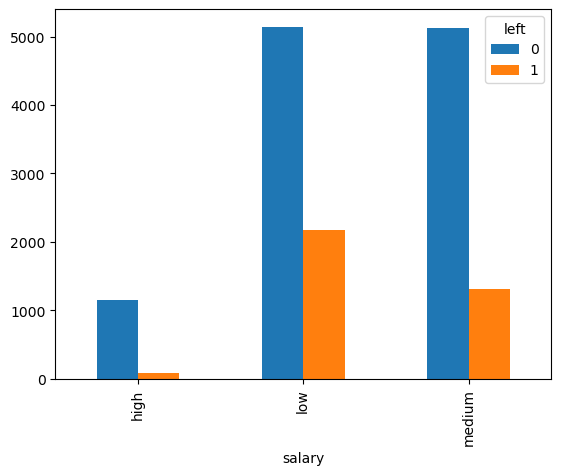

In [129]:
cliff.plot( kind ='bar') 
#  after looking at the grapg below we can conclude that people with leess salary are more likely to leave the company . 

In [130]:
subhr = hr[[ 'satisfaction_level'  , 'average_montly_hours'  ,'promotion_last_5years' , 'salary' ]] 

In [132]:
subhr

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


'''
Tackle salary dummy variable
Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.
'''


                                                                                        

In [135]:
sal_dum = pd.get_dummies( subhr.salary , prefix = 'salary') 
hr_dum = pd.concat ( [ sal_dum , subhr]  , axis = 1 )

In [136]:
hr_dum 

,salary_high,salary_low,salary_medium,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,False,True,False,0.38,157,0,low
1,False,False,True,0.80,262,0,medium
2,False,False,True,0.11,272,0,medium
3,False,True,False,0.72,223,0,low
4,False,True,False,0.37,159,0,low
...,...,...,...,...,...,...,...
14994,False,True,False,0.40,151,0,low
14995,False,True,False,0.37,160,0,low
14996,False,True,False,0.37,143,0,low
14997,False,True,False,0.11,280,0,low


In [138]:
hr_dum[['salary_high', 'salary_low', 'salary_medium']] = hr_dum[['salary_high', 'salary_low', 'salary_medium']].astype(int)


In [143]:
hr_dum.drop( 'salary' , axis ='columns'  , inplace = True )  

In [144]:
hr_dum 

,salary_high,salary_low,salary_medium,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,0.38,157,0
1,0,0,1,0.80,262,0
2,0,0,1,0.11,272,0
3,0,1,0,0.72,223,0
4,0,1,0,0.37,159,0
...,...,...,...,...,...,...
14994,0,1,0,0.40,151,0
14995,0,1,0,0.37,160,0
14996,0,1,0,0.37,143,0
14997,0,1,0,0.11,280,0


In [205]:
X = hr_dum 
X

,salary_high,salary_low,salary_medium,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,0.38,157,0
1,0,0,1,0.80,262,0
2,0,0,1,0.11,272,0
3,0,1,0,0.72,223,0
4,0,1,0,0.37,159,0
...,...,...,...,...,...,...
14994,0,1,0,0.40,151,0
14995,0,1,0,0.37,160,0
14996,0,1,0,0.37,143,0
14997,0,1,0,0.11,280,0


In [206]:
y = hr['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split 

In [207]:
X_train , X_test , y_train ,y_test = train_test_split( X , y , train_size = 0.4 )

In [208]:
from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression(max_iter=500)  # or even 1000


In [209]:
lr 

LogisticRegression(max_iter=500)

In [210]:
lr.fit( X_train  , y_train )

LogisticRegression(max_iter=500)

In [211]:
rick = lr.predict( X_test)

In [212]:
lr.score( X_test , y_test )

0.7785555555555556

In [172]:
# confusion matrix 

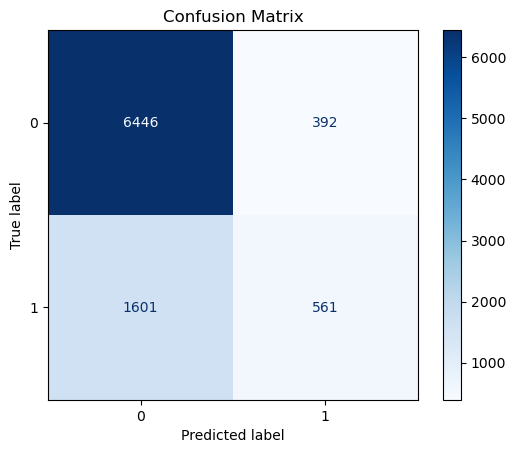

In [220]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# rick = predicted values

cm = confusion_matrix(y_test, rick )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show() 

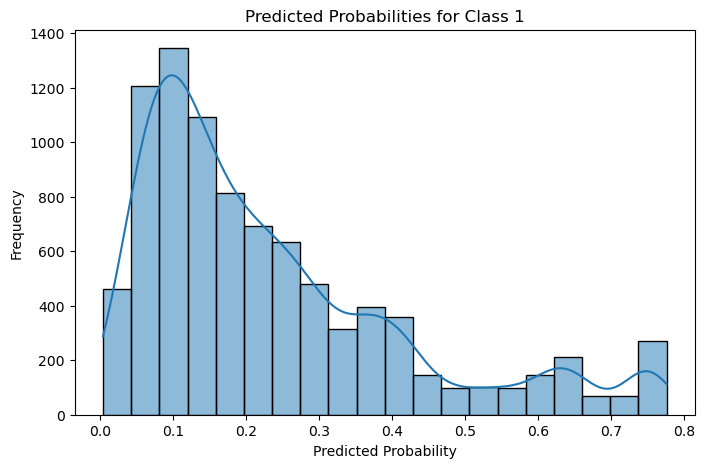

In [174]:
y_probs = lr.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)

plt.figure(figsize=(8, 5))
sns.histplot(y_probs, bins=20, kde=True)
plt.title("Predicted Probabilities for Class 1")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

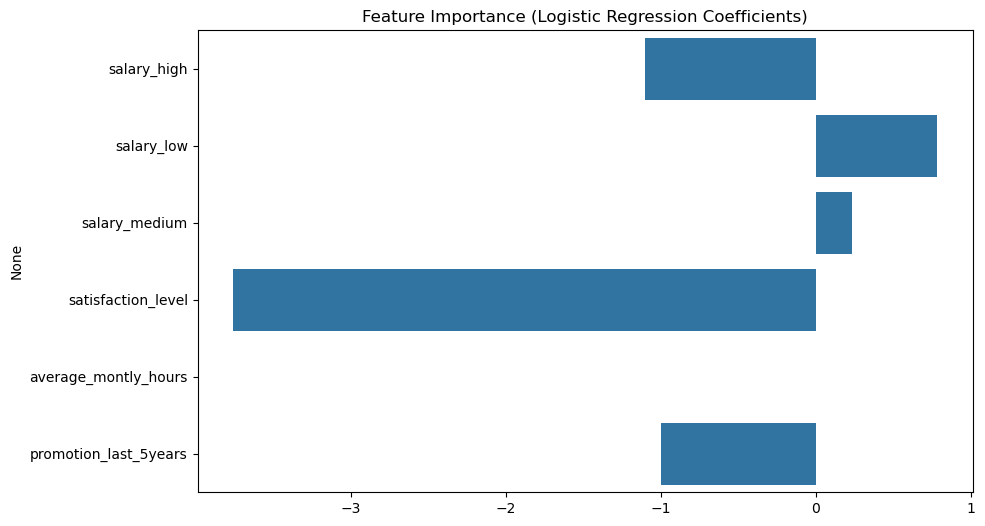

In [175]:
coefficients = lr.coef_[0]
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

E:\ttttana\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


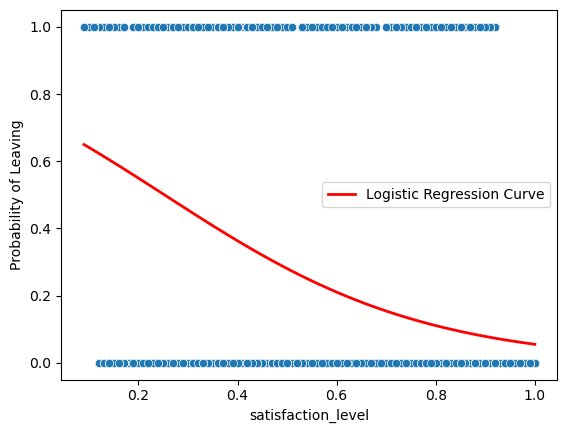

In [186]:
'''

# use differen t data varible instead of X .

X = hr[['satisfaction_level']]  # only 1 feature
y = hr['left']

# Train logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

# Scatter plot of data
sns.scatterplot(x='satisfaction_level', y='left', data=hr)

#Create X values for plotting curve (dense points along x-axis)
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict probabilities for these points
y_probs = lr.predict_proba(x_vals)[:, 1]

# Plot the logistic curve (probability of class 1 vs feature)
plt.plot(x_vals, y_probs, color='red', linewidth=2, label='Logistic Regression Curve')
plt.ylabel('Probability of Leaving')
plt.legend()
plt.show()
'''


<Axes: ylabel='left'>

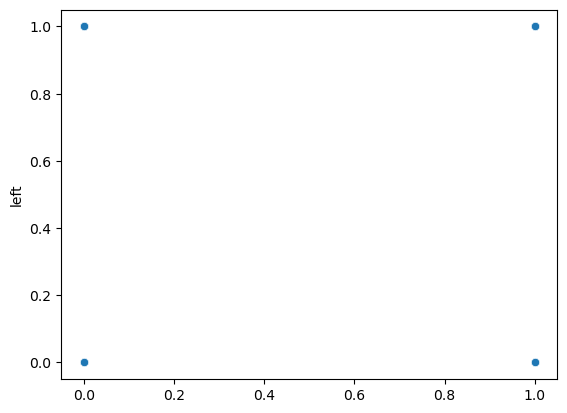

In [217]:
rick 


In [195]:
y_probs = lr.predict_proba(X_test)
y_probs

array([[0.94351789, 0.05648211],
       [0.35050313, 0.64949687],
       [0.74652192, 0.25347808],
       ...,
       [0.8773104 , 0.1226896 ],
       [0.77459093, 0.22540907],
       [0.80038283, 0.19961717]])

In [218]:
rick 

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)